## Series de Taylor

Una serie de Taylor es una **aproximación de funciones** diferenciables mediante una serie de potencias o suma de potencias enteras de polinomios en $$(x-a)^{n}$$. Dicha serie se calcula a partir de las derivadas de la función evaluadas en un determinado punto $a$. A la serie de Taylor alrededor del origen $a=0$ se le denomina serie de MacLaurin.

* la derivación e integración de una de estas series se puede realizar término a término, que resultan operaciones triviales
* se puede utilizar para calcular valores aproximados de funciones;
* es posible calcular la optimidad de la aproximación.

### Definición
La serie de Taylor para una función real o compleja $f(x)$ que es infinitamente diferenciable, $C^2$, alrededor del punto $a$ es la serie de potencias:

$$f(x) = f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots,$$

para **$x$ cercanas a $a$**. Si denotamos $f^{(n)}(a)$ como la *n*-ésima derivada de la función $f$ evaluada en el punto $a$ podemos reescribir la serie como 

$$\sum_{n=0} ^ {\infty} \frac {f^{(n)}(a)}{n!} (x-a)^{n}.$$

Vamos a hacer unos ejemplos:

## Sea  $f(x)=\frac{1}{1-x}$

Veamos primeramente como es la gráfica.

In [1]:
using Plots

gr()

Plots.GRBackend()

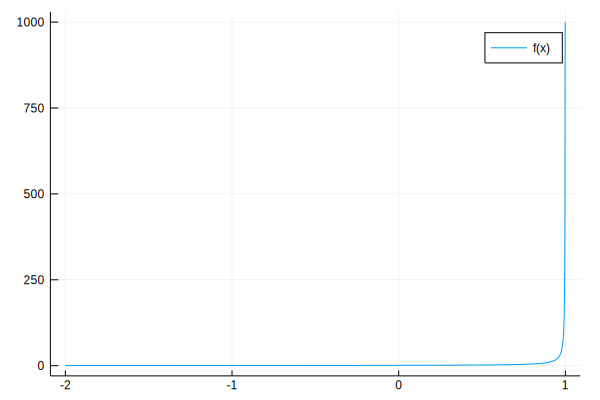

In [2]:
f(x)=1/(1-x)
δ=1e-3
xes = -2:δ:1

plot(xes,[f(x) for x in xes], lab="f(x)",)

In [22]:
xes=[i for i in -2:δ:1]

3001-element Array{Float64,1}:
 -2.0  
 -1.999
 -1.998
 -1.997
 -1.996
 -1.995
 -1.994
 -1.993
 -1.992
 -1.991
 -1.99 
 -1.989
 -1.988
  ⋮    
  0.989
  0.99 
  0.991
  0.992
  0.993
  0.994
  0.995
  0.996
  0.997
  0.998
  0.999
  1.0  

In [4]:
1/Inf

0.0

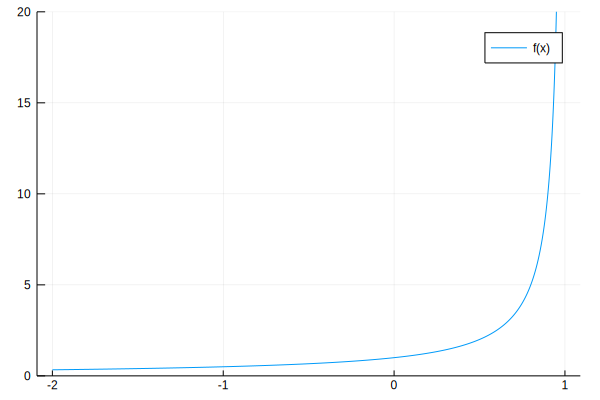

In [3]:
ylims!(0,20)

Vamos a calcular la serie alrededor del origen $a=0$. Primero las derivadas y luego las evaluamos

$$f'(x) = \frac{d}{dx}\frac{1}{1-x}=(-1)(1-x)^{-2}(-1)$$
$$f''(x) = \frac{d^2}{dx^2}\frac{1}{1-x}=(-2)(1-x)^{-3}(-1)$$
$$ \vdots$$

$$f^{(n)}(x) = n!(1-x)^{-(n+1)}$$

Por lo tanto podemos reescribrir nuestra función original como 

$$\frac{1}{1-x} = 1 + x + x^2 + x^3 \cdots$$

**Veamos el comportamiento de la serie conforme le agregamos términos**

In [6]:
f(-1)

0.5

In [9]:
x_0=-1
1+x_0+x_0^2+x_0^3+x_0^4

1

In [27]:
function serie_f(n,x)
    serie = 0
    for i in 0:n
        serie += x^i 
    end
    return serie
end

serie_f (generic function with 1 method)

In [20]:
serie_f(100,-0.5)

0.6666666666666667

In [18]:
serie_f(100,-2)

-6148914691236517205

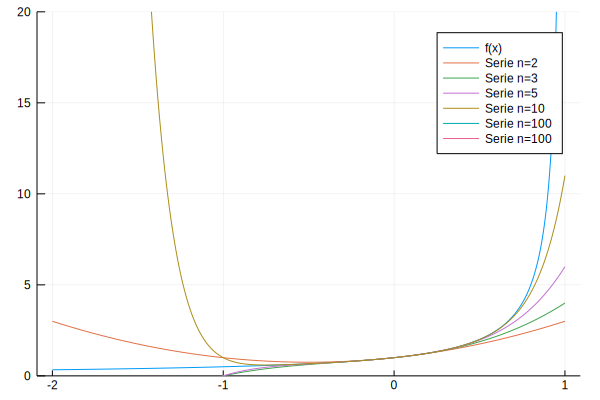

In [33]:
n=100
plot!(xes,[serie_f(n,x) for x in xes],lab="Serie n=$n")

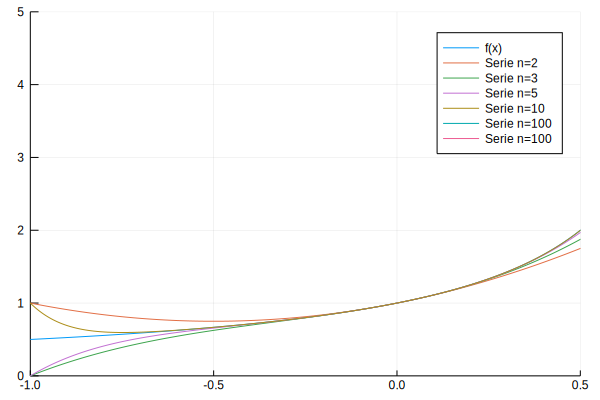

In [34]:
xlims!(-1,0.5)
ylims!(0,5)

## f(x) = cos(x)

### Ejercicio

Escriban un código que evalue los primeros *n* términos de la serie de taylor asociada a $\cos(x)$, cerca de $a=0$


$$f(x) = f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots,$$

$$f'(x) = -sin(x)$$

$$f''(x) = -cos(x)$$

$$\vdots$$

$$f'(0) = 0$$

$$f'(0) = -1$$

$$\vdots$$



In [35]:
function serie_cos(n,x)
    serie = 0
    for i in 0:n
        serie += ((-1)^i)*x^(2*i) /factorial(2i)
    end
    return serie
end

serie_cos (generic function with 1 method)

In [38]:
serie_cos(10,pi/2)

6.08176268469988e-17

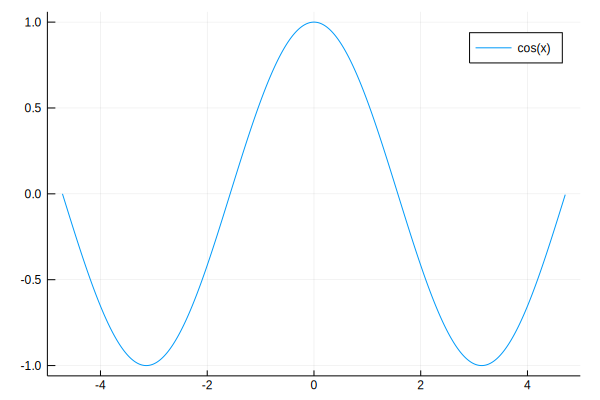

In [42]:
dominio = [i for i in -3pi/2:0.01:3pi/2]

plot(dominio,[cos(x) for x in dominio], lab="cos(x)")

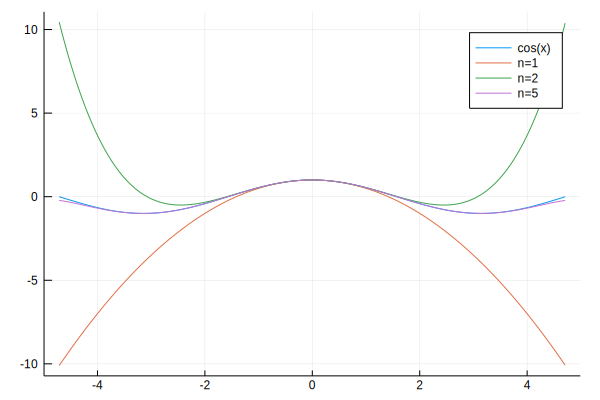

In [46]:
n=5
plot!(dominio,[serie_cos(n,x) for x in dominio],lab="n=$n")

# Diferencias finitas: cálculo numérico de derivadas

Vimos que el método de Newton requiere utilizar la derivada de una función. Ahora veremos una manera (no necesariamente la mejor) de calcular derivadas de funciones de forma numérica: **diferencias finitas**.

#### Ejercicio 1

Considera una función uni-dimensional $f: \mathbb{R} \to \mathbb{R}$, y supón que sea suficientemente diferenciable para que las derivadas que tomemos estén definidas [por ejemplo, si $f$ es de clase $C^\infty$].

(i) Escribe, usando notación LaTeX, la definición de la derivada $f'(a)$ de $f$ en el punto $a$.

$$\frac{df(x)}{dx}|_{x=a} = \lim_{h\to0} \frac{f(a+h)-f(a)}{h}$$

Desgraciadamente, **no podemos llevar a cabo el proceso de límite en la computadora**: un límite es algo **continuo**, mientras que la computadora maneja cantidades **discretas**.

(ii) ¿Cuál solución se te ocurre para esto en términos de la variable $h$? 

$$\frac{df(x)}{dx}|_{x=a} \approx \frac{f(a+h)-f(a)}{h} $$

si $h\ll1$

La expresión $f(a+h) - f(a)$ se llama una **diferencia para adelante** ("forward difference"), y cuando lo dividimos por un valor fijo de $h$ se llama un **cociente de diferencias** ("difference quotient"). Pero todo junto tambien se llama una diferencia finita.

(iii) ¿Geométricamente, a qué corresponde una diferencia de este tipo? ¿Y un cociente de diferencias?

Si $Y_1 = f(X_1)$ y $Y_0 = f(X_0)$  donde $X_1-X_0 = h$

#### Ejercicio 

(i) Escribe una función que implemente una diferencia para adelante para una función $f$, punto $a$ y paso $h$ dadas.

In [47]:
function dif_fin(f,a,h)
    return (f(a+h)-f(a))/h
end

dif_fin (generic function with 1 method)

In [50]:
g(x) = sin(x)
x_0 = pi/4
h = 0.1
dif_fin(g,x_0,h)

0.6706029729039897

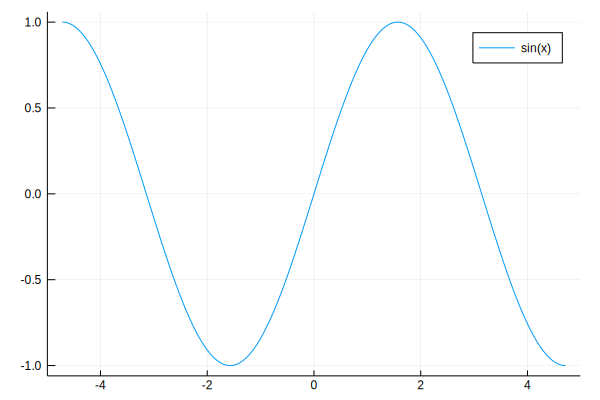

In [49]:
plot(dominio,[sin(x) for x in dominio],lab="sin(x)")

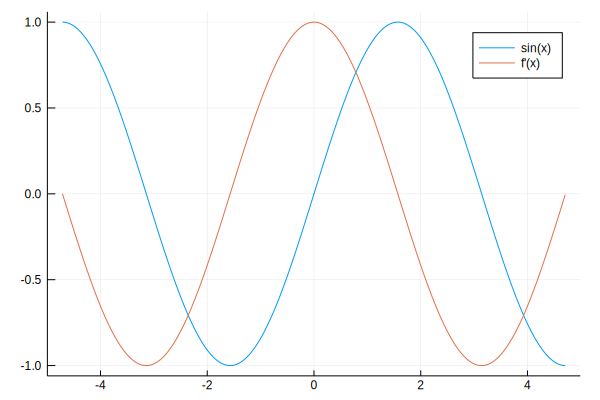

In [51]:
plot!(dominio,[cos(x) for x in dominio],lab="f'(x)")

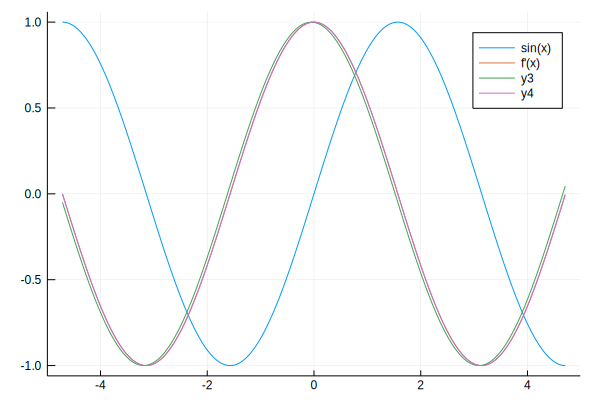

In [53]:
plot!(dominio,[dif_fin(sin,x,0.001) for x in dominio])

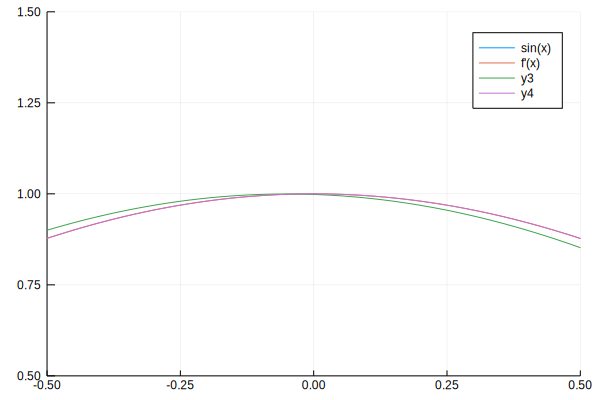

In [56]:
ylims!(.5,1.5)
xlims!(-.5,.5)

(ii) Para distintas funciones $f$, grafica la función $f$, su derivada analítica $f'$, y la aproximación a $f'$ utilizando diferencias finitas con distintos pasos $h$.

In [6]:
using Plots
gr()

Plots.GRBackend()

In [5]:
g(x) = exp(-x^2/2)
dg(x) = exp(-x^2/2)*(-x)


dg (generic function with 1 method)

In [4]:
h(x) = sin(1/x)
dh(x) = cos(1/x)*(-x^-2)

dh (generic function with 1 method)

El dominio de ambas gráficas es $x\in[0+\delta,5]$